In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import imread, showMatches
from skimage.color import rgb2gray
from scipy.ndimage.filters import convolve
import cv2
import sys
%matplotlib inline

In [20]:
#Image directory
dataDir = os.path.join('..', 'data', 'stitching')

#Read input images
testExamples = ['hill', 'field', 'ledge', 'pier', 'river' 'roofs', 'building', 'uttower']
exampleIndex = 0
imageName1 = '{}1_r.jpg'.format(testExamples[exampleIndex])
imageName2 = '{}2_r.jpg'.format(testExamples[exampleIndex])

im1 = imread(os.path.join(dataDir, imageName1))
im2 = imread(os.path.join(dataDir, imageName2))

In [25]:
gray_im1 = cv2.normalize(rgb2gray(im1), None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
gray_im2 = cv2.normalize(rgb2gray(im2), None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image18bit,None)
kp2, des2 = sift.detectAndCompute(gray_im2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [35]:
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
matches = np.asarray(good)

if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError('Cannott find enough keypoints.')

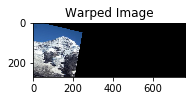

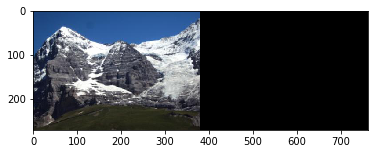

In [53]:
dst = cv2.warpPerspective(im2,H,(im1.shape[1] + im2.shape[1], im1.shape[0]))
plt.subplot(122)
plt.imshow(dst)
plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:im1.shape[0], 0:im2.shape[1]] = im1
#cv2.imwrite(‘=output.jpg’,dst)
plt.imshow(dst)
plt.show()